In [90]:
# !pip install pandas numpy seaborn matplotlib klib dtable scikit-learn joblib

In [91]:
import numpy as np
import pandas as pd

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

import Utils.F1 as ult



In [92]:
file_path = "./Online Retail.xlsx"
df = pd.read_excel(file_path)

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [93]:
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [94]:
#checking what is null in each null rows
rows_with_na = df[df.isna().any(axis=1)]
# rows_with_na.head(100)

# removing the null values
df.dropna(inplace=True)
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [95]:
# droping the country column
df.drop(columns=['Country'],inplace=True)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 24.8+ MB


In [97]:
df['CustomerID'] = df['CustomerID'].astype(int)


In [98]:
df['IsCancelled'] = df['InvoiceNo'].str.startswith('c').astype(bool)
df = df[df['IsCancelled']]
df.reset_index(drop=True, inplace=True)

df

# cancelled_data = df['InvoiceNo'].str.startswith('c').astype(bool)
# cancelled_data = ~cancelled_data
# print("Number of cancelled invoices: ", sum(cancelled_data))

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,IsCancelled
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,True
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,True
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,True
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,True
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,True
...,...,...,...,...,...,...,...,...
397919,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,True
397920,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,True
397921,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,True
397922,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,True


In [99]:
df.drop(columns=['IsCancelled'], inplace=True)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850


In [100]:
df = ult.update_descriptions_quntity(df)
df

,InvoiceNo,StockCode,Description,InvoiceDate,UnitPrice,CustomerID,Quantity
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2010-12-01 08:26:00,2.55,17850,6
1,536365,71053,WHITE METAL LANTERN,2010-12-01 08:26:00,3.39,17850,6
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,2010-12-01 08:26:00,2.75,17850,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,2010-12-01 08:26:00,3.39,17850,6
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,2010-12-01 08:26:00,3.39,17850,6
...,...,...,...,...,...,...,...
387973,581587,22613,PACK OF 20 SPACEBOY NAPKINS,2011-12-09 12:50:00,0.85,12680,12
387974,581587,22899,CHILDREN'S APRON DOLLY GIRL,2011-12-09 12:50:00,2.10,12680,6
387975,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,2011-12-09 12:50:00,4.15,12680,4
387976,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,2011-12-09 12:50:00,4.15,12680,4


In [129]:
product_name = df['Description']
product_name.drop_duplicates(inplace=True)
product_name.reset_index(drop=True,inplace=True)
product_name

0        WHITE HANGING HEART T-LIGHT HOLDER
1                       WHITE METAL LANTERN
2            CREAM CUPID HEARTS COAT HANGER
3       KNITTED UNION FLAG HOT WATER BOTTLE
4            RED WOOLLY HOTTIE WHITE HEART.
                       ...                 
3642              LETTER "U" BLING KEY RING
3643              LETTER "W" BLING KEY RING
3644              LETTER "Z" BLING KEY RING
3645         PINK CRYSTAL SKULL PHONE CHARM
3646            PAPER CRAFT , LITTLE BIRDIE
Name: Description, Length: 3647, dtype: object

In [134]:
# Check 

invoice_item_536412 = df[df['InvoiceNo'] == 536412]
invoice_item_536412.reset_index(drop=True,inplace=True)
invoice_item_536412

,InvoiceNo,StockCode,Description,InvoiceDate,UnitPrice,CustomerID,Quantity
0,536412,20728,LUNCH BAG CARS BLUE,2010-12-01 11:49:00,1.65,17920,3
1,536412,22382,LUNCH BAG SPACEBOY DESIGN,2010-12-01 11:49:00,1.65,17920,3
2,536412,22326,ROUND SNACK BOXES SET OF4 WOODLAND,2010-12-01 11:49:00,2.95,17920,1
3,536412,22662,LUNCH BAG DOLLY GIRL DESIGN,2010-12-01 11:49:00,1.65,17920,4
4,536412,22383,LUNCH BAG SUKI DESIGN,2010-12-01 11:49:00,1.65,17920,3
5,536412,20727,LUNCH BAG BLACK SKULL.,2010-12-01 11:49:00,1.65,17920,3
6,536412,22328,ROUND SNACK BOXES SET OF 4 FRUITS,2010-12-01 11:49:00,2.95,17920,1
7,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,2010-12-01 11:49:00,2.95,17920,2
8,536412,22630,DOLLY GIRL LUNCH BOX,2010-12-01 11:49:00,1.95,17920,1
9,536412,22629,SPACEBOY LUNCH BOX,2010-12-01 11:49:00,1.95,17920,1


## Partial data cleaing done

## Visualization

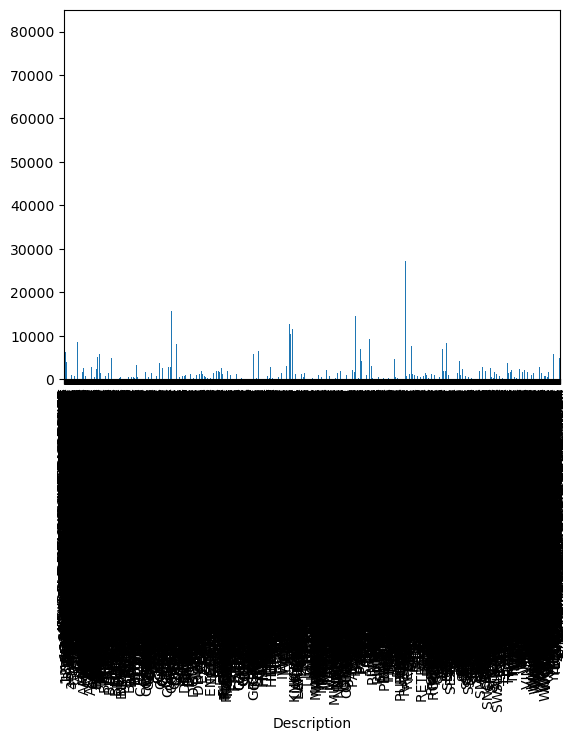

<Figure size 2000x2000 with 0 Axes>

In [143]:
product_sale = df.groupby('Description')['Quantity'].sum()

product_sale.plot(kind='bar')

plt.show()

## Underlying process yet to complete

In [ ]:
customer_sales = df.groupby('CustomerID')['Quantity'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
customer_sales.head(10).plot(kind='bar',rot=0, )
plt.xlabel('Customer ID')
plt.ylabel('Total Quantity Sold')
plt.show()

In [17]:
# Check 
customerID_14646 = df[df['CustomerID'] == 14646]
customerID_14646_total_item_bought = customerID_14646['Quantity'].sum()
customerID_14646_total_item_bought

197491

In [ ]:
df.info()
df.describe()

In [ ]:
# checing for Outliners using Boxplot

sns.boxplot(data=df,x=df['CustomerID'], y=df['Quantity'])

In [ ]:
# customer_sales = df.groupby('CustomerID')['Quantity_agg'].sum().sort_values(ascending=False)
# df.drop(columns=['Quantity_agg'], axis=1 )


In [ ]:
# item_to_drop = df[df['CustomerID'] == 14646].index
# df = df.drop(item_to_drop)
# df.info()

In [ ]:
# sns.boxplot(data=df,x=df['CustomerID'], y=df['Quantity_agg'])

In [ ]:
# df.groupby('CustomerID')['Quantity_agg'].sum().sort_values(ascending=False)